### Import Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
# to ignore warnings
import warnings
warnings.filterwarnings('ignore')

#### Load Dataset

In [2]:
df = pd.read_csv("loan_data.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [4]:
df.count()

Loan_ID              614
Gender               601
Married              611
Dependents           599
Education            614
Self_Employed        582
ApplicantIncome      614
CoapplicantIncome    614
LoanAmount           592
Loan_Amount_Term     600
Credit_History       564
Property_Area        614
Loan_Status          614
dtype: int64

## GRAPHICAL VISUALIZATION
### Target Variable

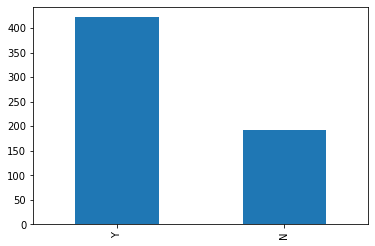

In [7]:
df['Loan_Status'].value_counts().plot.bar()

<b>Note:</b> The loan of 422 (around 69%) people out of 614 was approved.
### Independent Variable
There are 5 features that are categorical or binary (Gender, Married, Self_Employed, Credit_History, Education)

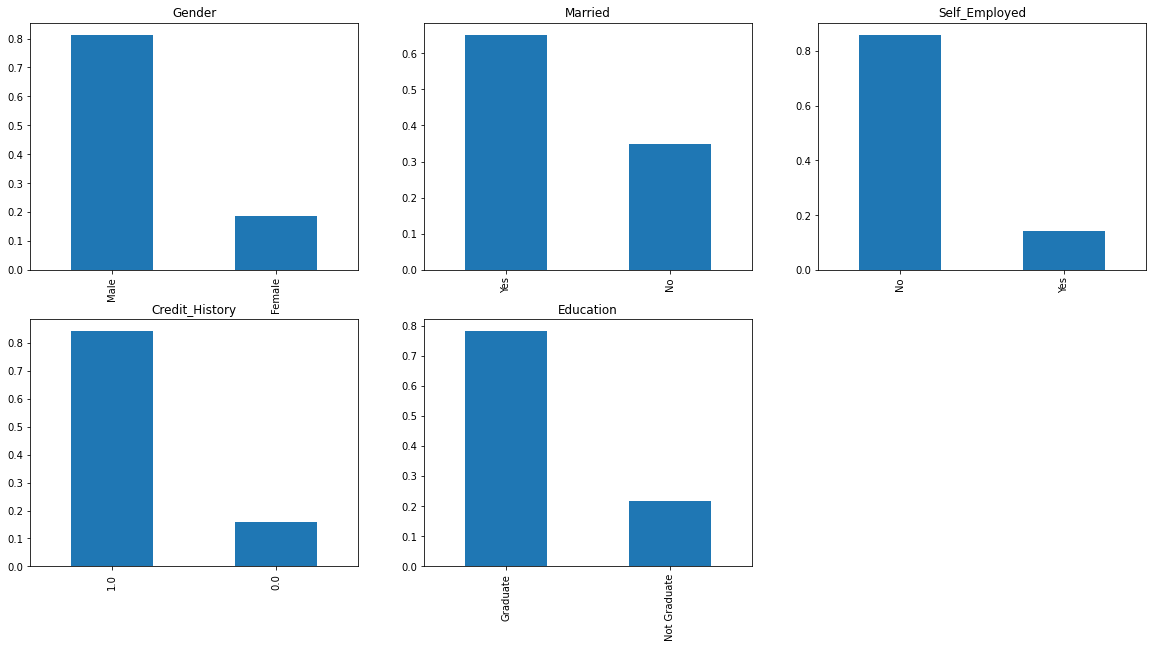

In [12]:
# Visualizing Independent Variable

plt.subplot(231)
df['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Gender')

plt.subplot(232)
df['Married'].value_counts(normalize=True).plot.bar(title= 'Married')

plt.subplot(233)
df['Self_Employed'].value_counts(normalize=True).plot.bar(title= 'Self_Employed')

plt.subplot(234)
df['Credit_History'].value_counts(normalize=True).plot.bar(title= 'Credit_History')

plt.subplot(235)
df['Education'].value_counts(normalize=True).plot.bar(title= 'Education')

plt.show()


It can be inferred from the above bar plots that:
- 80% applicants in the dataset are male.
- Around 65% of the applicants in the dataset are married.
- Around 15% applicants in the dataset are self employed.
- Around 85% applicants have credit history (repaid their debts).
- Around 80% of the applicants are Graduate.

### Independent Variable (Ordinal)

There are 2 features that are Ordinal: Variables in categorical features having some order involved (Dependents, Property_Area)

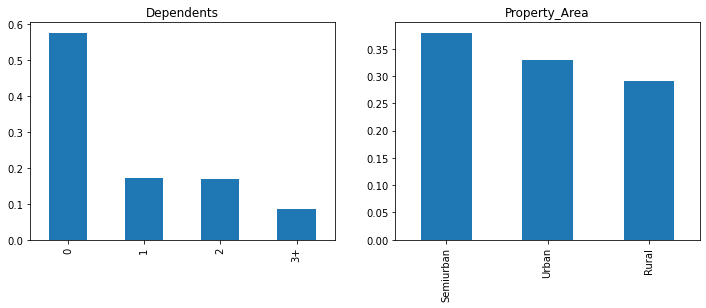

In [13]:
plt.subplot(121)
df['Dependents'].value_counts(normalize=True).plot.bar(figsize=(12,4), title= 'Dependents')

plt.subplot(122)
df['Property_Area'].value_counts(normalize=True).plot.bar(title= 'Property_Area')

plt.show()

### Independent Variable (Numerical)

There are 4 features that are Numerical: These features have numerical values (ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term)

Firstly, let’s look at the Applicant income distribution: